In [89]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [90]:

MS=False
dir="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map2_Covariances/results_CodeBenjamin/SLICS_euclidLike/"
ells=np.geomspace(45.7292, 46826.7, 300)



In [91]:
dir_comparison="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS_theta_4_to_16/"


if MS:
    Map2=np.load(dir_comparison+"map_squared_ngal_0_shapenoise_0.npy")
else:
    Map2=np.load(dir_comparison+"map_squared.npy")


cov_FFT=np.cov(Map2)



In [92]:
cov_Pell_gauss=np.loadtxt(dir+"thps_cov_1_1_1_matrix.dat")
cov_Pell_nongauss=np.loadtxt(dir+"thps_cov_1_2_1_matrix.dat")
cov_Pell_ssc=np.loadtxt(dir+"thps_cov_1_4_1_matrix.dat")



In [93]:
cov_Pell_gauss

array([[2.11180831e-15, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.92097121e-15, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.74741252e-15, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.37137360e-25, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.12737835e-25, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.89449813e-25]])

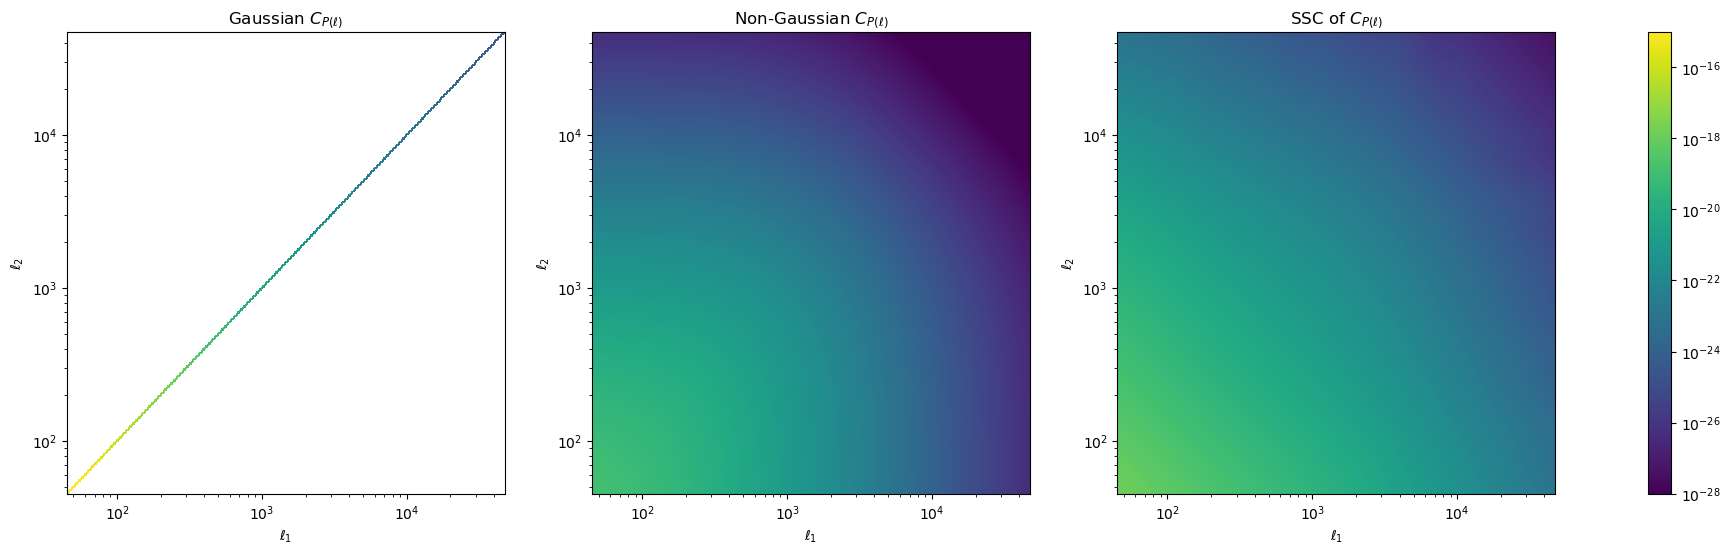

In [94]:
fig, axs=plt.subplots(ncols=3, figsize=(24,6))



vmin=1e-28
vmax=1e-15

axs[0].set_title(r"Gaussian $C_{P(\ell)}$")
axs[0].set_xlabel(r'$\ell_1$')
axs[0].set_ylabel(r'$\ell_2$')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

im=axs[0].pcolor(ells, ells,cov_Pell_gauss, norm=LogNorm(vmin=vmin, vmax=vmax))



axs[1].set_title(r"Non-Gaussian $C_{P(\ell)}$")
axs[1].set_xlabel(r'$\ell_1$')
axs[1].set_ylabel(r'$\ell_2$')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
im=axs[1].pcolor(ells, ells,cov_Pell_nongauss, norm=LogNorm(vmin=vmin, vmax=vmax))


axs[2].set_title(r"SSC of $C_{P(\ell)}$")
axs[2].set_xlabel(r'$\ell_1$')
axs[2].set_ylabel(r'$\ell_2$')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
im=axs[2].pcolor(ells, ells, cov_Pell_ssc, norm=LogNorm(vmin=vmin, vmax=vmax))
fig.colorbar(im, ax=axs.ravel())

plt.show()
#plt.savefig(dir+"/Covariances_powerspectrum.png", dpi=300)


In [95]:
def u_hat(eta):
    tmp=0.5*eta*eta
    return tmp*np.exp(-tmp)


In [96]:
def v(ells, theta):
    ells_centers=0.5*(ells[1:]+ells[:-1])
    ells_bins=ells[1:]-ells[:-1]

    us=u_hat(ells_centers*theta)
    return ells_centers*ells_bins*us*us

In [97]:
def C(theta1, theta2, ells, C_P):
    v1=v(ells, theta1)
    v2=v(ells, theta2)
    return v1.dot(C_P[:-1,:-1].dot(v2.T))/np.power(2*np.pi, 2)



In [98]:
if MS:
    thetas=np.array([2,4,8,16])
else:
    thetas=np.array([4,8,16])

Nthetas=len(thetas)

cov_Map3_gauss=np.zeros((Nthetas, Nthetas))
cov_Map3_nongauss=np.zeros((Nthetas, Nthetas))
cov_Map3_ssc=np.zeros((Nthetas, Nthetas))

thetas_rad=np.deg2rad(thetas/60)

for i,theta1 in enumerate(thetas_rad):
    for j,theta2 in enumerate(thetas_rad):
        cov_Map3_gauss[i,j]=C(theta1, theta2, ells, cov_Pell_gauss)
        cov_Map3_nongauss[i,j]=C(theta1, theta2, ells, cov_Pell_nongauss)
        cov_Map3_ssc[i,j]=C(theta1, theta2, ells, cov_Pell_ssc)

np.savetxt("Map2_cov_square_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat", cov_Map3_gauss+cov_Map3_nongauss+cov_Map3_ssc)

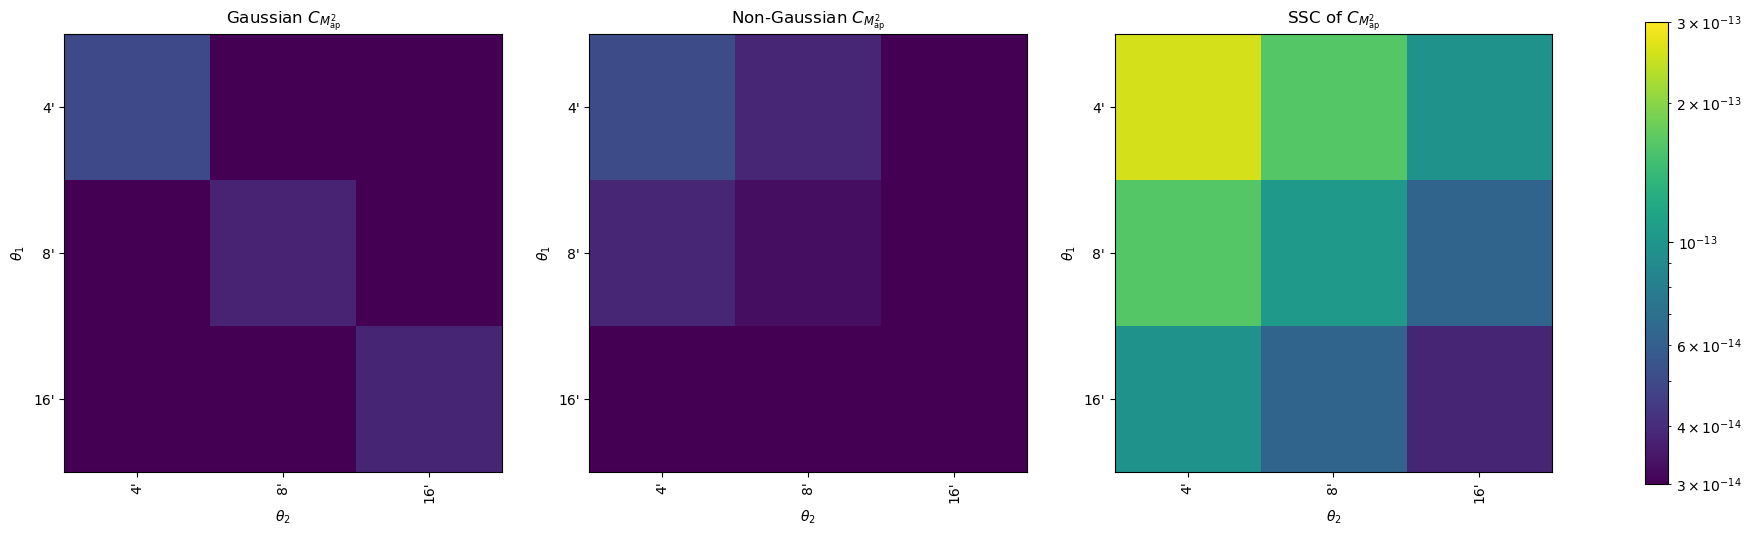

In [99]:

thetas_labels = []
for thetas_ in thetas:
    thetas_labels.append(f"{thetas_}'")

thetas_ticks = np.arange(0, Nthetas)

fig, axs=plt.subplots(ncols=3, figsize=(24,6))

if MS:
    vmin=1e-14
    vmax=1e-11
else:
    vmin=3e-14
    vmax=3e-13


axs[0].set_title(r"Gaussian $C_{M_\mathrm{ap}^2}$")
axs[0].set_ylabel(r'$\theta_1$')
axs[0].set_yticks(thetas_ticks)
axs[0].set_yticklabels(thetas_labels)
axs[0].set_xlabel(r'$\theta_2$')
axs[0].set_xticks(thetas_ticks)
axs[0].set_xticklabels(thetas_labels, rotation=90)

im=axs[0].imshow(cov_Map3_gauss, norm=LogNorm(vmin=vmin, vmax=vmax))



axs[1].set_title(r"Non-Gaussian $C_{M_\mathrm{ap}^2}$")
axs[1].set_ylabel(r'$\theta_1$')
axs[1].set_yticks(thetas_ticks)
axs[1].set_yticklabels(thetas_labels)
axs[1].set_xlabel(r'$\theta_2$')
axs[1].set_xticks(thetas_ticks)
axs[1].set_xticklabels(thetas_labels, rotation=90)

im=axs[1].imshow(cov_Map3_nongauss, norm=LogNorm(vmin=vmin, vmax=vmax))


axs[2].set_title(r"SSC of $C_{M_\mathrm{ap}^2}$")
axs[2].set_ylabel(r'$\theta_1$')
axs[2].set_yticks(thetas_ticks)
axs[2].set_yticklabels(thetas_labels)
axs[2].set_xlabel(r'$\theta_2$')
axs[2].set_xticks(thetas_ticks)
axs[2].set_xticklabels(thetas_labels, rotation=90)

im=axs[2].imshow( cov_Map3_ssc, norm=LogNorm(vmin=vmin, vmax=vmax))
fig.colorbar(im, ax=axs.ravel())


plt.savefig(dir+"/Covariances_aperturestatistics.png", dpi=300)


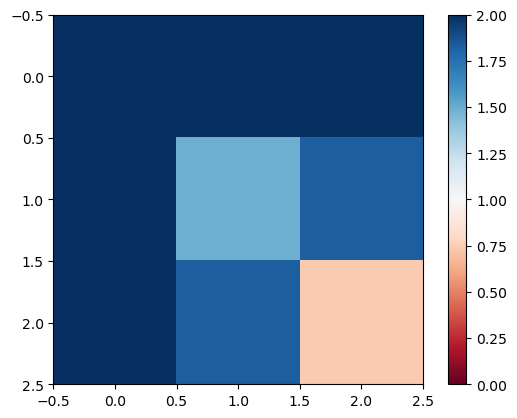

In [100]:
plt.imshow(cov_Map3_ssc/(cov_Map3_gauss+cov_Map3_nongauss), vmin=0, vmax=2, cmap="RdBu")
plt.colorbar()

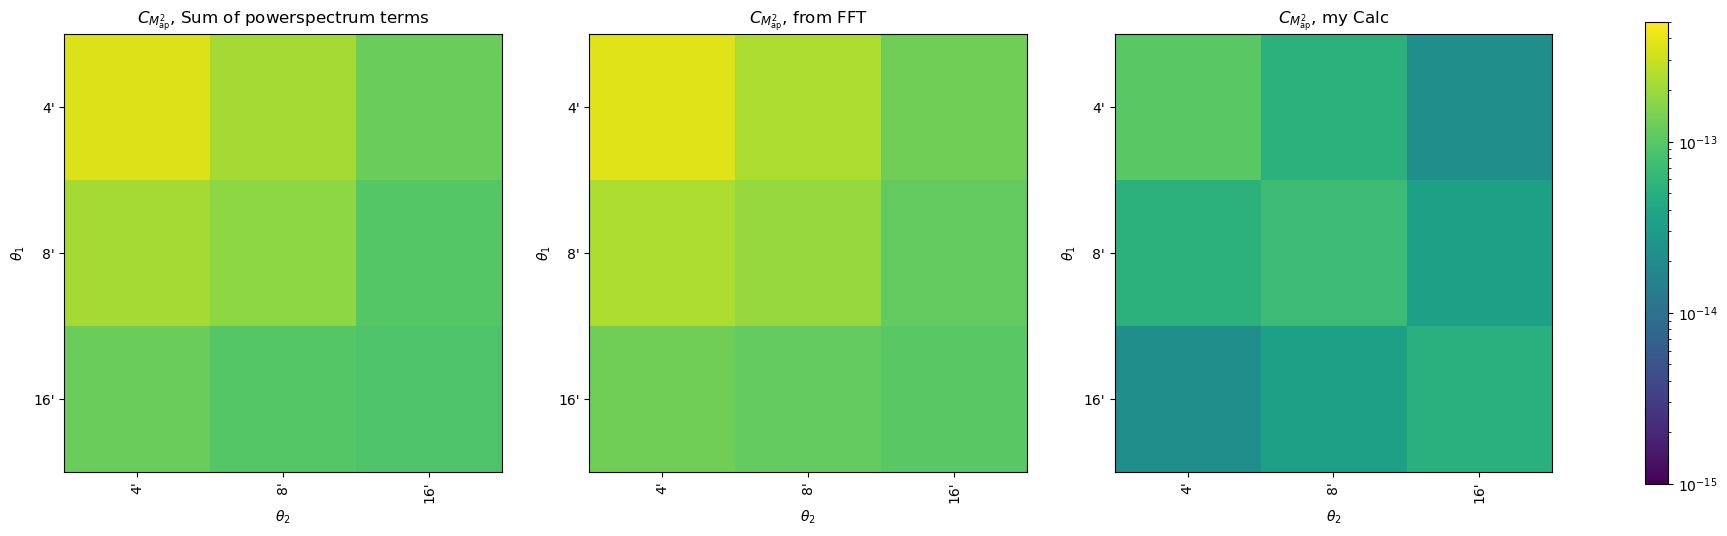

In [101]:

cov_gauss_myCalc=cov_Map3_gauss
cov_nongauss_myCalc=cov_Map3_nongauss

fig, axs=plt.subplots(ncols=3, figsize=(24,6))

if MS:
    vmin=1e-14
    vmax=1e-11
else:
    vmin=1e-15
    vmax=5e-13

axs[0].set_title(r"$C_{M_\mathrm{ap}^2}$, Sum of powerspectrum terms")
axs[0].set_ylabel(r'$\theta_1$')
axs[0].set_yticks(thetas_ticks)
axs[0].set_yticklabels(thetas_labels)
axs[0].set_xlabel(r'$\theta_2$')
axs[0].set_xticks(thetas_ticks)
axs[0].set_xticklabels(thetas_labels, rotation=90)

im=axs[0].imshow(cov_Map3_gauss+cov_Map3_nongauss+cov_Map3_ssc, norm=LogNorm(vmin=vmin, vmax=vmax))



axs[1].set_title(r"$C_{M_\mathrm{ap}^2}$, from FFT")
axs[1].set_ylabel(r'$\theta_1$')
axs[1].set_yticks(thetas_ticks)
axs[1].set_yticklabels(thetas_labels)
axs[1].set_xlabel(r'$\theta_2$')
axs[1].set_xticks(thetas_ticks)
axs[1].set_xticklabels(thetas_labels, rotation=90)

im=axs[1].imshow(cov_FFT, norm=LogNorm(vmin=vmin, vmax=vmax))


axs[2].set_title(r"$C_{M_\mathrm{ap}^2}$, my Calc")
axs[2].set_ylabel(r'$\theta_1$')
axs[2].set_yticks(thetas_ticks)
axs[2].set_yticklabels(thetas_labels)
axs[2].set_xlabel(r'$\theta_2$')
axs[2].set_xticks(thetas_ticks)
axs[2].set_xticklabels(thetas_labels, rotation=90)

im=axs[2].imshow(cov_gauss_myCalc+cov_nongauss_myCalc, norm=LogNorm(vmin=vmin, vmax=vmax))
fig.colorbar(im, ax=axs.ravel())


plt.savefig(dir+"/Covariances_aperturestatistics_fullComparison.png", dpi=300)


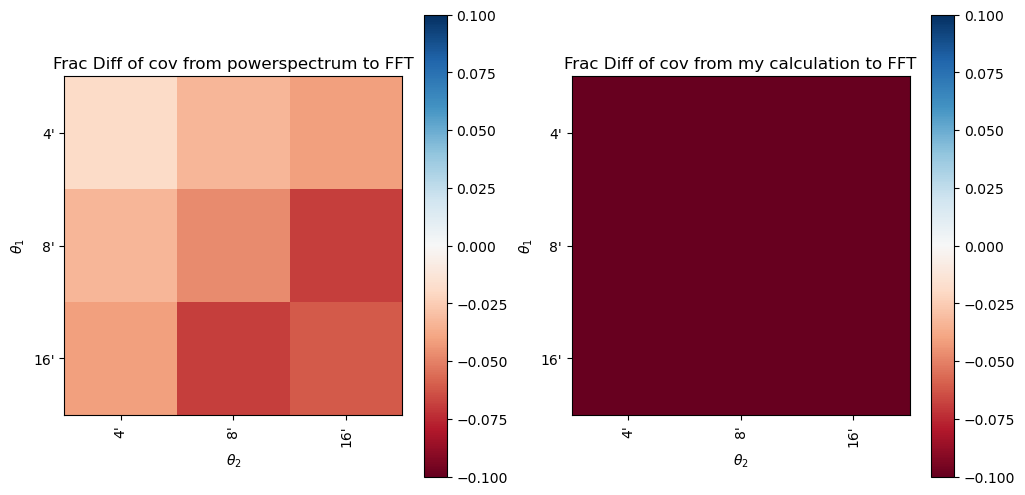

In [102]:

fig, axs=plt.subplots(ncols=2, figsize=(12,6))



vmin=-0.1
vmax=0.1

axs[0].set_title(r"Frac Diff of cov from powerspectrum to FFT")
axs[0].set_ylabel(r'$\theta_1$')
axs[0].set_yticks(thetas_ticks)
axs[0].set_yticklabels(thetas_labels)
axs[0].set_xlabel(r'$\theta_2$')
axs[0].set_xticks(thetas_ticks)
axs[0].set_xticklabels(thetas_labels, rotation=90)

im=axs[0].imshow((cov_Map3_gauss+cov_Map3_nongauss+cov_Map3_ssc-cov_FFT)/(cov_Map3_gauss+cov_Map3_nongauss+cov_Map3_ssc+cov_FFT), vmin=vmin, vmax=vmax, cmap="RdBu")

fig.colorbar(im, ax=axs[0])


axs[1].set_title(r"Frac Diff of cov from my calculation to FFT")
axs[1].set_ylabel(r'$\theta_1$')
axs[1].set_yticks(thetas_ticks)
axs[1].set_yticklabels(thetas_labels)
axs[1].set_xlabel(r'$\theta_2$')
axs[1].set_xticks(thetas_ticks)
axs[1].set_xticklabels(thetas_labels, rotation=90)

im=axs[1].imshow((cov_gauss_myCalc+cov_nongauss_myCalc-cov_FFT)/(cov_gauss_myCalc+cov_nongauss_myCalc+cov_FFT), vmin=vmin, vmax=vmax, cmap="RdBu")

fig.colorbar(im, ax=axs[1])


plt.savefig(dir+"/Covariances_aperturestatistics_fullComparison_fracDiffs.png", dpi=300)


In [103]:
(cov_Map3_gauss+cov_Map3_nongauss+cov_Map3_ssc-cov_FFT)/(cov_Map3_gauss+cov_Map3_nongauss+cov_Map3_ssc+cov_FFT)

array([[-0.01926154, -0.03323892, -0.04062545],
       [-0.03323892, -0.0473761 , -0.06920562],
       [-0.04062545, -0.06920562, -0.06150063]])

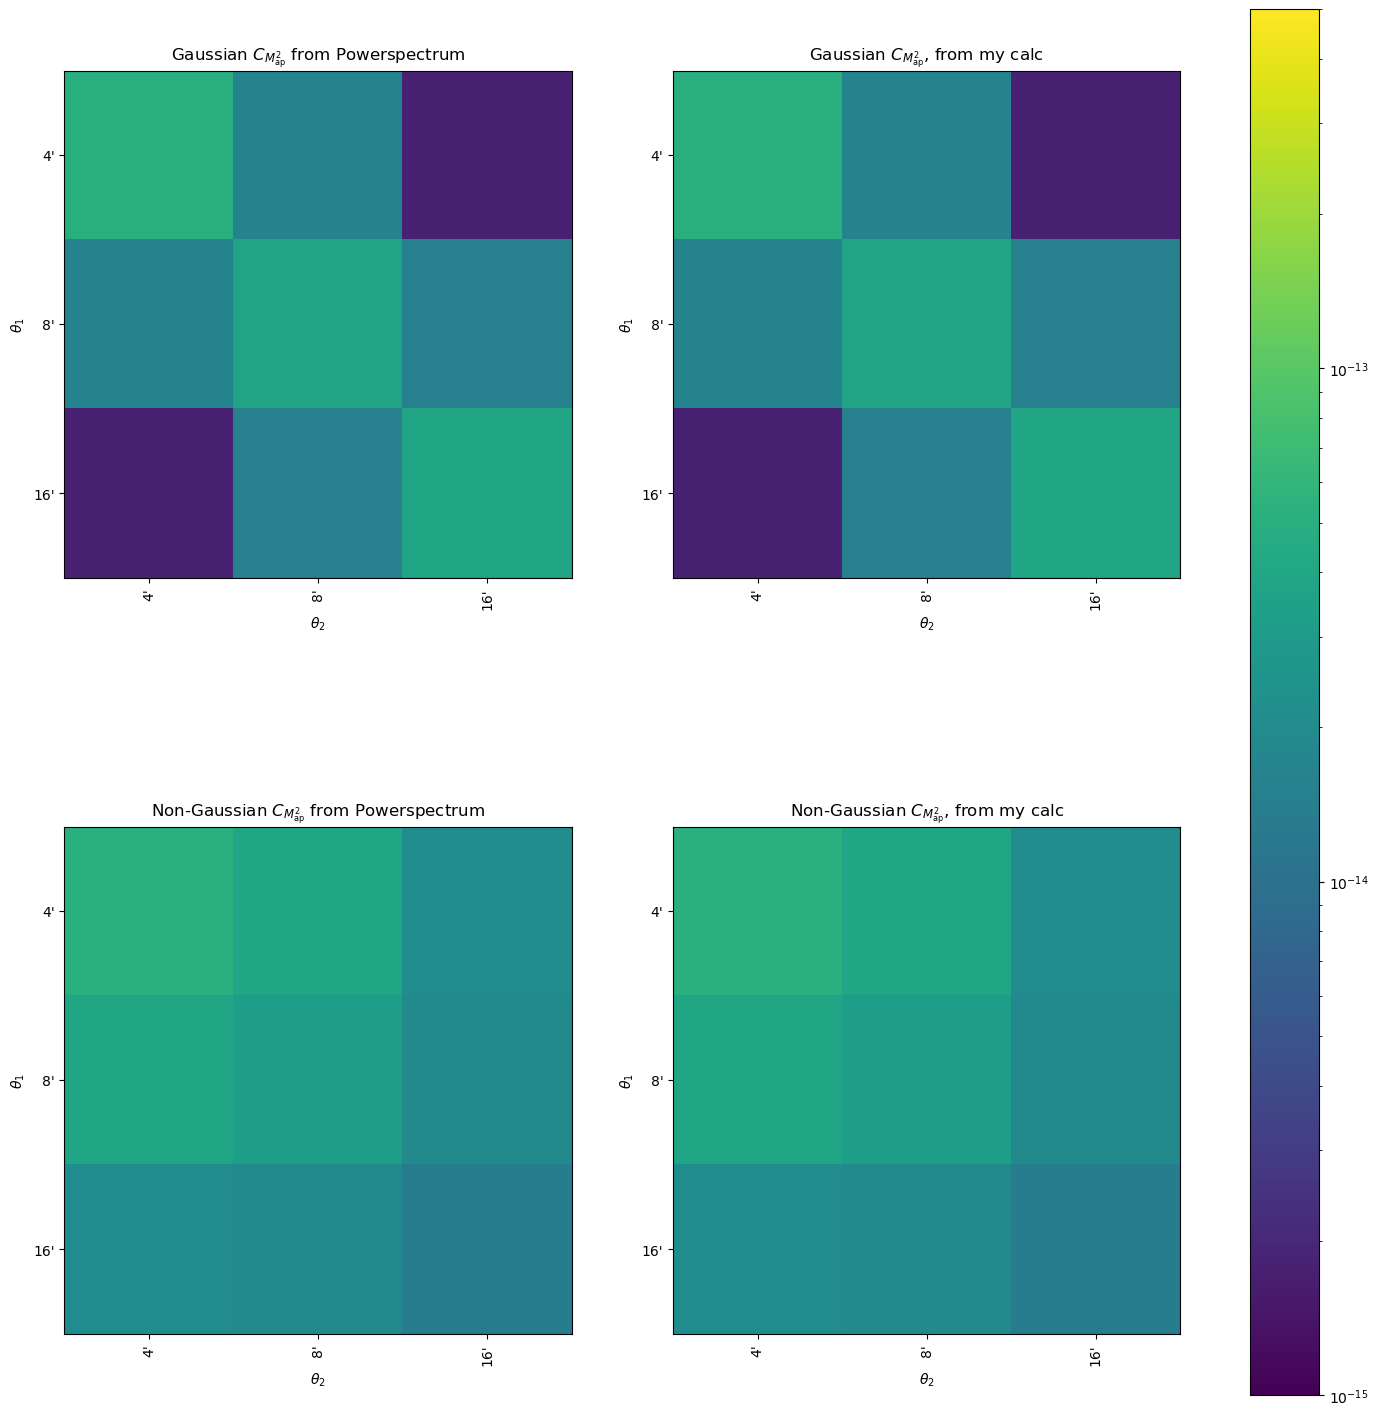

In [104]:

fig, axs=plt.subplots(ncols=2, nrows=2, figsize=(18,18))

if MS:
    vmin=1e-14
    vmax=1e-11
else:
    vmin=1e-15
    vmax=5e-13

axs[0][0].set_title(r"Gaussian $C_{M_\mathrm{ap}^2}$ from Powerspectrum")
axs[0][0].set_ylabel(r'$\theta_1$')
axs[0][0].set_yticks(thetas_ticks)
axs[0][0].set_yticklabels(thetas_labels)
axs[0][0].set_xlabel(r'$\theta_2$')
axs[0][0].set_xticks(thetas_ticks)
axs[0][0].set_xticklabels(thetas_labels, rotation=90)

im=axs[0][0].imshow(cov_Map3_gauss, norm=LogNorm(vmin=vmin, vmax=vmax))



axs[0][1].set_title(r"Gaussian $C_{M_\mathrm{ap}^2}$, from my calc")
axs[0][1].set_ylabel(r'$\theta_1$')
axs[0][1].set_yticks(thetas_ticks)
axs[0][1].set_yticklabels(thetas_labels)
axs[0][1].set_xlabel(r'$\theta_2$')
axs[0][1].set_xticks(thetas_ticks)
axs[0][1].set_xticklabels(thetas_labels, rotation=90)

im=axs[0][1].imshow(cov_gauss_myCalc, norm=LogNorm(vmin=vmin, vmax=vmax))



axs[1][0].set_title(r"Non-Gaussian $C_{M_\mathrm{ap}^2}$ from Powerspectrum")
axs[1][0].set_ylabel(r'$\theta_1$')
axs[1][0].set_yticks(thetas_ticks)
axs[1][0].set_yticklabels(thetas_labels)
axs[1][0].set_xlabel(r'$\theta_2$')
axs[1][0].set_xticks(thetas_ticks)
axs[1][0].set_xticklabels(thetas_labels, rotation=90)

im=axs[1][0].imshow(cov_Map3_nongauss, norm=LogNorm(vmin=vmin, vmax=vmax))



axs[1][1].set_title(r"Non-Gaussian $C_{M_\mathrm{ap}^2}$, from my calc")
axs[1][1].set_ylabel(r'$\theta_1$')
axs[1][1].set_yticks(thetas_ticks)
axs[1][1].set_yticklabels(thetas_labels)
axs[1][1].set_xlabel(r'$\theta_2$')
axs[1][1].set_xticks(thetas_ticks)
axs[1][1].set_xticklabels(thetas_labels, rotation=90)

im=axs[1][1].imshow(cov_nongauss_myCalc, norm=LogNorm(vmin=vmin, vmax=vmax))


fig.colorbar(im, ax=axs.ravel())


plt.savefig(dir+"/Covariances_aperturestatistics_indTermsComparison.png", dpi=300)


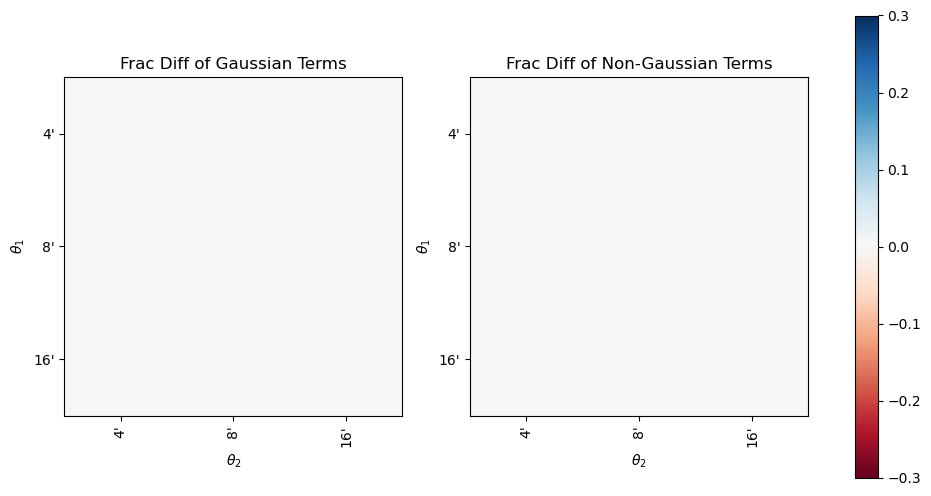

In [105]:

fig, axs=plt.subplots(ncols=2, figsize=(12,6))


vmin=-0.3
vmax=0.3

axs[0].set_title(r"Frac Diff of Gaussian Terms")
axs[0].set_ylabel(r'$\theta_1$')
axs[0].set_yticks(thetas_ticks)
axs[0].set_yticklabels(thetas_labels)
axs[0].set_xlabel(r'$\theta_2$')
axs[0].set_xticks(thetas_ticks)
axs[0].set_xticklabels(thetas_labels, rotation=90)

im=axs[0].imshow((cov_Map3_gauss-cov_gauss_myCalc)/(cov_Map3_gauss+cov_gauss_myCalc), vmin=vmin, vmax=vmax, cmap="RdBu")




axs[1].set_title(r"Frac Diff of Non-Gaussian Terms")
axs[1].set_ylabel(r'$\theta_1$')
axs[1].set_yticks(thetas_ticks)
axs[1].set_yticklabels(thetas_labels)
axs[1].set_xlabel(r'$\theta_2$')
axs[1].set_xticks(thetas_ticks)
axs[1].set_xticklabels(thetas_labels, rotation=90)

im=axs[1].imshow((cov_Map3_nongauss-cov_nongauss_myCalc)/(cov_Map3_nongauss+cov_nongauss_myCalc), vmin=vmin, vmax=vmax, cmap="RdBu")

fig.colorbar(im, ax=axs.ravel())


plt.savefig(dir+"/Covariances_aperturestatistics_indTermsComparison_fracDiff.png", dpi=300)
